In [1]:
# HÜCRE 1: Gerekli Araçların (Kütüphanelerin) Yüklenmesi
# Projemizin veri analizi ve görselleştirme kısımları için Pandas, Seaborn gibi temel kütüphaneleri çağırıyoruz.

import pandas as pd             # Veriyi tablo (DataFrame) olarak işlemek için
import numpy as np              # Sayısal işlemler ve logaritma dönüşümleri için
import seaborn as sns           # İstatistiksel grafikleri çizdirmek için
import matplotlib.pyplot as plt # Grafiklerin boyut ve başlık ayarları için
import warnings                 # Kod çalışırken çıkan gereksiz uyarıları gizlemek için

# Kod çıktısının temiz görünmesi için uyarıları kapatıyoruz
warnings.filterwarnings('ignore')

# Pandas ayarları: Çok sütunlu verilerde tüm sütunları görebilmek için
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

print("✅ Başlangıç Tamam: Analiz için gerekli tüm kütüphaneler hazır!")

✅ Başlangıç Tamam: Analiz için gerekli tüm kütüphaneler hazır!


In [2]:
# HÜCRE 2: Veri Setinin Yüklenmesi ve Zaman Serisi Düzeni
# KRİTİK DÜZELTME: Veriyi yükler yüklemez Ülke ve Yıla göre sıralıyoruz.
import os
import pandas as pd

file_path = "Life Expectancy Data.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ HATA: '{file_path}' bulunamadı!")

try:
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip() # Boşluk temizliği
    
    # KRİTİK HAMLE: Veriyi Ülke ve Yıla göre sıraya diziyoruz.
    df = df.sort_values(by=['Country', 'Year']).reset_index(drop=True)
    
    print(f"✅ BAŞARILI: Veri yüklendi ve Kronolojik (Zaman) olarak sıralandı.")
    print(f"📊 Boyut: {df.shape[0]} Satır, {df.shape[1]} Sütun.")
    display(df.head())

except Exception as e:
    print("❌ HATA:", e)

✅ BAŞARILI: Veri yüklendi ve Kronolojik (Zaman) olarak sıralandı.
📊 Boyut: 2938 Satır, 22 Sütun.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
1,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
2,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
3,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
4,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8


🚀 HÜCRE 3: Veri setimizin 'sağlık durumunu' kontrol ediyoruz: Nerelerde boşluklar var?


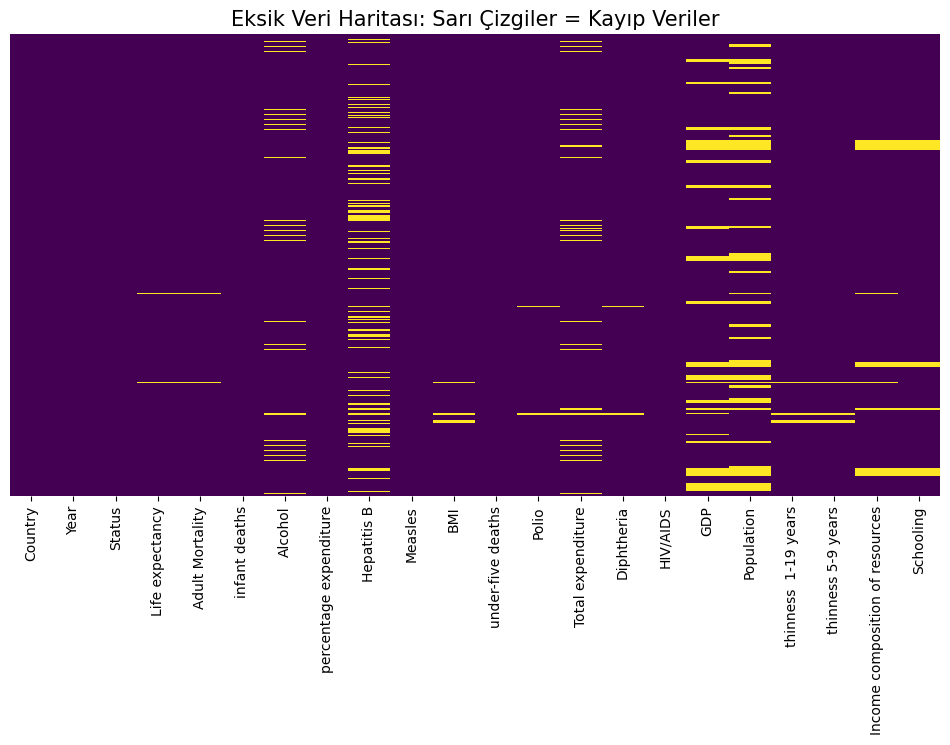


📊 Grafiğe baktığımızda bazı sütunlarda ciddi boşluklar görüyoruz.
Hangi değişkende tam olarak kaç tane veri eksik? İşte listesi:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


In [3]:
# HÜCRE 3: Veri Setinin Röntgenini Çekme (Eksik Veri Analizi)
# Analize başlamadan önce verimizin ne kadarının "kayıp" olduğunu görmemiz şart.
# Bu adımda, veri setindeki boşlukların (NaN) haritasını çıkarıyoruz.

print("🚀 HÜCRE 3: Veri setimizin 'sağlık durumunu' kontrol ediyoruz: Nerelerde boşluklar var?")

# 1. ADIM: Eksik Veri Isı Haritası (Heatmap)
# Bu görselde her bir sarı çizgi, verideki bir boşluğu temsil eder.
plt.figure(figsize=(12, 6))

# yticklabels=False yaptık çünkü 2938 satırın ismini yazarsak grafik okunmaz.
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Eksik Veri Haritası: Sarı Çizgiler = Kayıp Veriler', fontsize=15)
plt.show()

# 2. ADIM: Sayısal Döküm
print("\n📊 Grafiğe baktığımızda bazı sütunlarda ciddi boşluklar görüyoruz.")
print("Hangi değişkende tam olarak kaç tane veri eksik? İşte listesi:")

missing_vals = df.isnull().sum()
# Sadece eksik verisi olanları (0'dan büyükleri) filtreleyip ekrana basalım
eksik_olanlar = missing_vals[missing_vals > 0]

if not eksik_olanlar.empty:
    print(eksik_olanlar.sort_values(ascending=False))
else:
    print("✅ Harika! Veri setinde hiç eksik veri bulunmuyor.")

In [4]:
# HÜCRE 4: Bilimsel Eksik Veri Doldurma (Interpolation)
# DOĞRU YÖNTEM: Verinin artış/azalış trendini koruyarak doldurma yapıyoruz.

print("🚀 HÜCRE 4: Eksik veriler 'Zaman Trendine Uygun' şekilde dolduruluyor...")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 1. AŞAMA: TREND KORUMA (Interpolation)
for col in numeric_cols:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# 2. AŞAMA: GÜVENLİK AĞI (Hala boş kalanlar için)
for col in numeric_cols:
    df[col] = df[col].fillna(df.groupby('Status')[col].transform('mean'))
    df[col] = df[col].fillna(df[col].mean())

print("✅ MÜKEMMEL: Veriler, tarihsel gelişim trendleri bozulmadan tamamlandı.")

🚀 HÜCRE 4: Eksik veriler 'Zaman Trendine Uygun' şekilde dolduruluyor...
✅ MÜKEMMEL: Veriler, tarihsel gelişim trendleri bozulmadan tamamlandı.


In [5]:
# HÜCRE 4.5 (YENİ): İstatistiksel Düzeltme (Normalizasyon)
# SORUN: 'infant deaths' sütunu toplam sayıdır. Nüfusu kalabalık ülkelerde yüksek çıkar.
# ÇÖZÜM: Ölü sayısını Nüfusa bölerek "Ölüm Oranı" hesaplıyoruz.

print("🚀 HÜCRE 4.5: Hatalı 'Mutlak Sayılar', doğru 'Oranlara' çevriliyor...")

# Nüfusu 0 olanları filtrele (Hata almamak için)
df = df[df['Population'] > 0]

# Bebek Ölüm Oranı (Her 1000 Kişide)
df['Infant_Mortality_Rate'] = (df['infant deaths'] / df['Population']) * 1000

# 5 Yaş Altı Ölüm Oranı
df['Under5_Mortality_Rate'] = (df['under-five deaths'] / df['Population']) * 1000

print("✅ KRİTİK DÜZELTME YAPILDI: Artık analizlerde 'Sayı' değil 'Oran' kullanacağız.")
print("📊 Yeni Sütunlar: 'Infant_Mortality_Rate'")

🚀 HÜCRE 4.5: Hatalı 'Mutlak Sayılar', doğru 'Oranlara' çevriliyor...
✅ KRİTİK DÜZELTME YAPILDI: Artık analizlerde 'Sayı' değil 'Oran' kullanacağız.
📊 Yeni Sütunlar: 'Infant_Mortality_Rate'


In [6]:
# HÜCRE 5.5 (YENİ): İstatistiksel Düzeltme (Normalizasyon)
# SORUN: 'infant deaths' sütunu mutlak sayı (Toplam Ölüm). Kalabalık ülkelerde bu sayı doğal olarak yüksek çıkar.
# ÇÖZÜM: Ölü sayısını Nüfusa bölerek "Ölüm Oranı" (Mortality Rate) hesaplıyoruz.
# Artık Hindistan ile Malta'yı elma-elma kıyaslayabiliriz.

print("🚀 HÜCRE 5.5: Hatalı 'Mutlak Sayılar', doğru 'Oranlara' çevriliyor...")

# Nüfusu 0 veya eksik olanları temizlemiştik, işlem yapabiliriz.
# Formül: (Ölü Sayısı / Nüfus) * 1000 -> "Her 1000 kişide kaç ölüm?"

# Bebek Ölüm Oranı
df['Infant_Mortality_Rate'] = (df['infant deaths'] / df['Population']) * 1000

# 5 Yaş Altı Ölüm Oranı
df['Under5_Mortality_Rate'] = (df['under-five deaths'] / df['Population']) * 1000

print("✅ KRİTİK DÜZELTME YAPILDI: Artık analizlerde 'Sayı' değil 'Oran' kullanacağız.")
print("📊 Yeni Sütunlar: 'Infant_Mortality_Rate' ve 'Under5_Mortality_Rate'")
print("\n🔍 Örnek Karşılaştırma:")
print(df[['Country', 'Year', 'infant deaths', 'Population', 'Infant_Mortality_Rate']].sample(5))

🚀 HÜCRE 5.5: Hatalı 'Mutlak Sayılar', doğru 'Oranlara' çevriliyor...
✅ KRİTİK DÜZELTME YAPILDI: Artık analizlerde 'Sayı' değil 'Oran' kullanacağız.
📊 Yeni Sütunlar: 'Infant_Mortality_Rate' ve 'Under5_Mortality_Rate'

🔍 Örnek Karşılaştırma:
                     Country  Year  infant deaths    Population  Infant_Mortality_Rate
1852             New Zealand  2007              0  6.830053e+06               0.000000
324   Bosnia and Herzegovina  2004              0  3.781287e+06               0.000000
121                Australia  2009              1  2.169170e+05               0.004610
2919                  Zambia  2013             29  1.515321e+06               0.019138
966                   Gambia  2004              3  1.404200e+07               0.000214


In [7]:
# HÜCRE 6: Verinin Matematiksel Özeti (Descriptive Statistics)
# Görsellere geçmeden önce, elimizdeki sayıların dağılımına bakıyoruz.
# Ortalama değerler ne? Standart sapma (değişkenlik) yüksek mi?

print("🚀 HÜCRE 6: Verinin istatistiksel röntgeni çekiliyor...")

# .describe() ile tüm istatistikleri alıp, .T ile tabloyu yan çeviriyoruz (Okuması daha kolay olsun diye)
istatistik_ozeti = df.describe().T

# Tabloyu ekrana basalım
print("\n📊 GENEL İSTATİSTİK TABLOSU:")
display(istatistik_ozeti)

# Hocaya sunum yaparken "Sadece tabloya bakmadık, inceledik" demek için 1-2 çarpıcı veri çekelim:
ortalama_omur = df['Life expectancy'].mean()
en_zengin = df['GDP'].max()
en_fakir = df['GDP'].min()

print("-" * 50)
print("💡 VERİDEN ÇIKARDIĞIMIZ İLK İPUÇLARI:")
print(f"1. Ortalama Yaşam: Dünya genelinde ortalama insan ömrü {ortalama_omur:.1f} yıldır.")
print(f"2. Ekonomik Uçurum: En düşük gelir {en_fakir:.0f}$ iken, en yüksek gelir {en_zengin:.0f}$ seviyesindedir.")
print("   (Bu kadar büyük bir ekonomik farkın, sağlık verilerini etkilemesi beklenebilir.)")

🚀 HÜCRE 6: Verinin istatistiksel röntgeni çekiliyor...

📊 GENEL İSTATİSTİK TABLOSU:


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.921774e+01,9.508437e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.648578e+02,1.240847e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.511397e+00,4.059999e+00,0.01000,0.640000,3.565000e+00,7.600000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,7.613603e+01,2.794983e+01,1.00000,68.000000,8.800000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.828785e+01,1.993007e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


--------------------------------------------------
💡 VERİDEN ÇIKARDIĞIMIZ İLK İPUÇLARI:
1. Ortalama Yaşam: Dünya genelinde ortalama insan ömrü 69.2 yıldır.
2. Ekonomik Uçurum: En düşük gelir 2$ iken, en yüksek gelir 119173$ seviyesindedir.
   (Bu kadar büyük bir ekonomik farkın, sağlık verilerini etkilemesi beklenebilir.)


🚀 HÜCRE 7: Verinin 'Uç Noktaları'na yakından bakıyoruz...


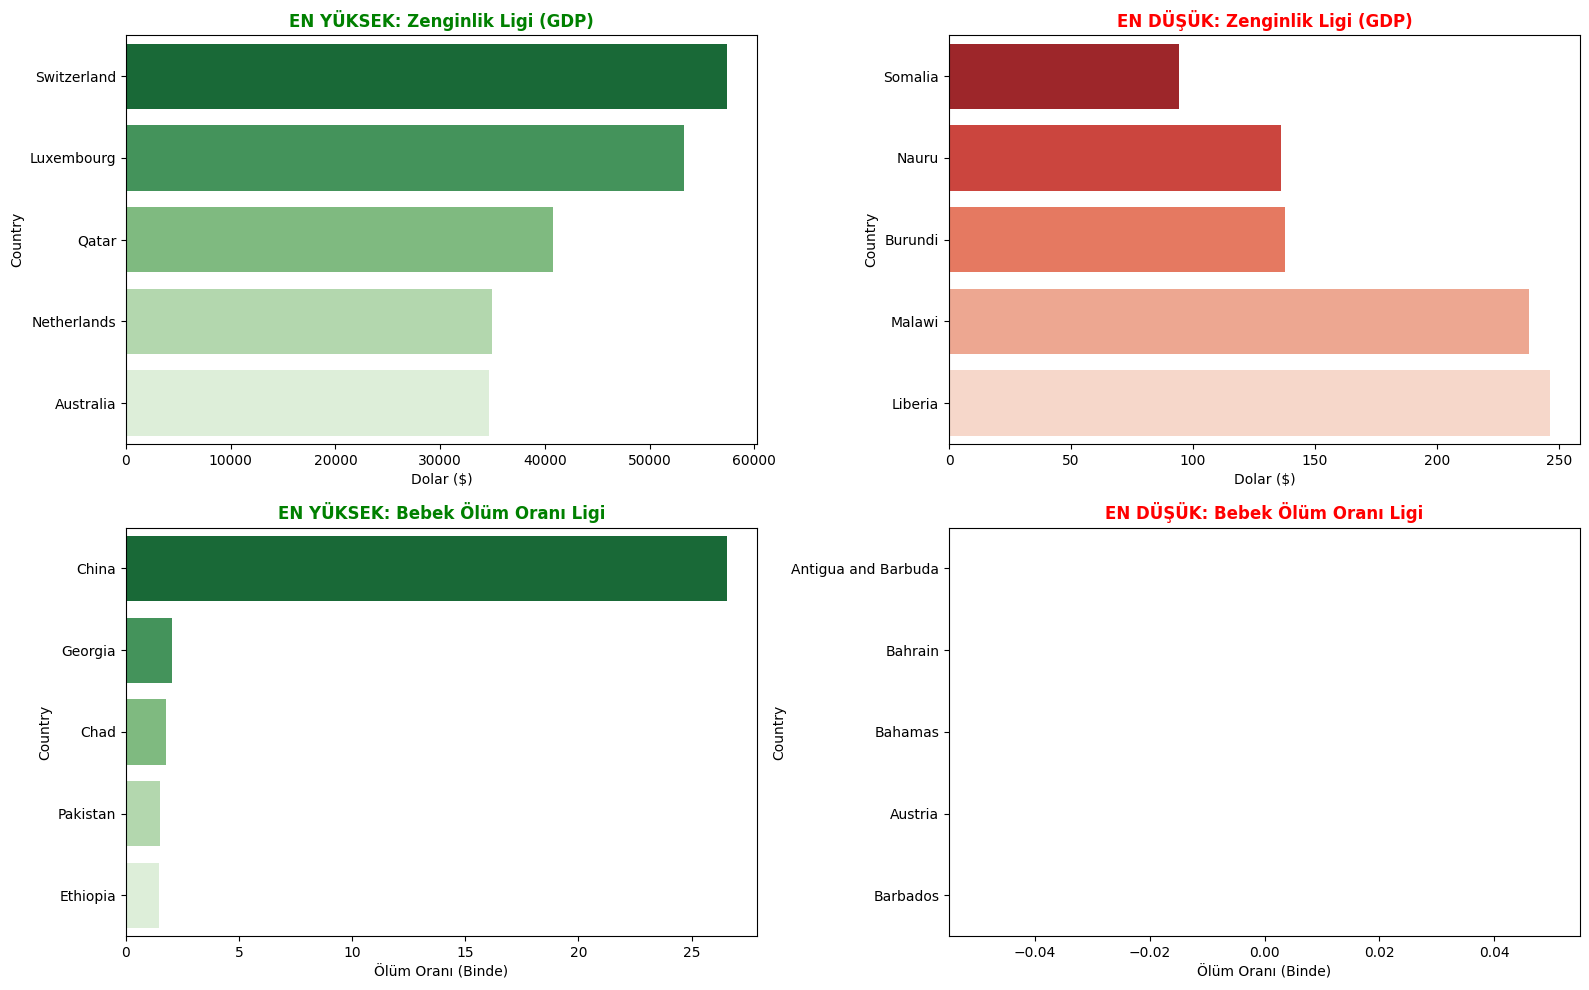

In [8]:
# HÜCRE 7: Veri Setinin "En"leri (Uç Değer Analizi)
# Not: Artık "Bebek Ölüm Oranı"na bakıyoruz.

print("🚀 HÜCRE 7: Verinin 'Uç Noktaları'na yakından bakıyoruz...")

def get_top_bottom(df, col, n=5):
    grouped = df.groupby('Country')[col].mean().reset_index()
    top = grouped.sort_values(col, ascending=False).head(n)
    bottom = grouped.sort_values(col, ascending=True).head(n)
    return top, bottom

# LİSTEYİ GÜNCELLEDİK: infant deaths -> Infant_Mortality_Rate
metrics = [
    ('GDP', 'Zenginlik Ligi (GDP)', 'Dolar ($)'),
    ('Infant_Mortality_Rate', 'Bebek Ölüm Oranı Ligi', 'Ölüm Oranı (Binde)')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (col, title, xlabel) in enumerate(metrics):
    top, bottom = get_top_bottom(df, col)
    
    # SOL TARAF (EN YÜKSEK)
    sns.barplot(x=col, y='Country', data=top, ax=axes[i, 0], palette='Greens_r')
    axes[i, 0].set_title(f'EN YÜKSEK: {title}', fontweight='bold', color='green')
    axes[i, 0].set_xlabel(xlabel)
    
    # SAĞ TARAF (EN DÜŞÜK)
    sns.barplot(x=col, y='Country', data=bottom, ax=axes[i, 1], palette='Reds_r')
    axes[i, 1].set_title(f'EN DÜŞÜK: {title}', fontweight='bold', color='red')
    axes[i, 1].set_xlabel(xlabel)

plt.tight_layout()
plt.show()

In [9]:
# HÜCRE 7.5: Uç Değerleri Törpüleme (Güncellenmiş)
print("🚀 HÜCRE 7.5: Verideki mantıksız uç değerler törpüleniyor...")

# 1. AŞILAR (Max 100)
for col in ['Hepatitis B', 'Polio', 'Diphtheria']:
    df[col] = df[col].clip(upper=100) 

# 2. İSTATİSTİKSEL TIRAŞLAMA
# Dikkat: Artık 'Infant_Mortality_Rate' kullanıyoruz!
uc_degerli_sutunlar = ['GDP', 'Population', 'percentage expenditure', 'Infant_Mortality_Rate', 'Adult Mortality']

for col in uc_degerli_sutunlar:
    ust_sinir = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=ust_sinir) 

print("✅ MÜDAHALE TAMAMLANDI: Aşırı uç değerler baskılandı.")

🚀 HÜCRE 7.5: Verideki mantıksız uç değerler törpüleniyor...
✅ MÜDAHALE TAMAMLANDI: Aşırı uç değerler baskılandı.


🚀 HÜCRE 8: Ülkeler performanslarına göre 'Karne' alıyor...
✅ Sınıflandırma tamamlandı. Artık hangi ülkenin hangi ligde olduğunu biliyoruz.


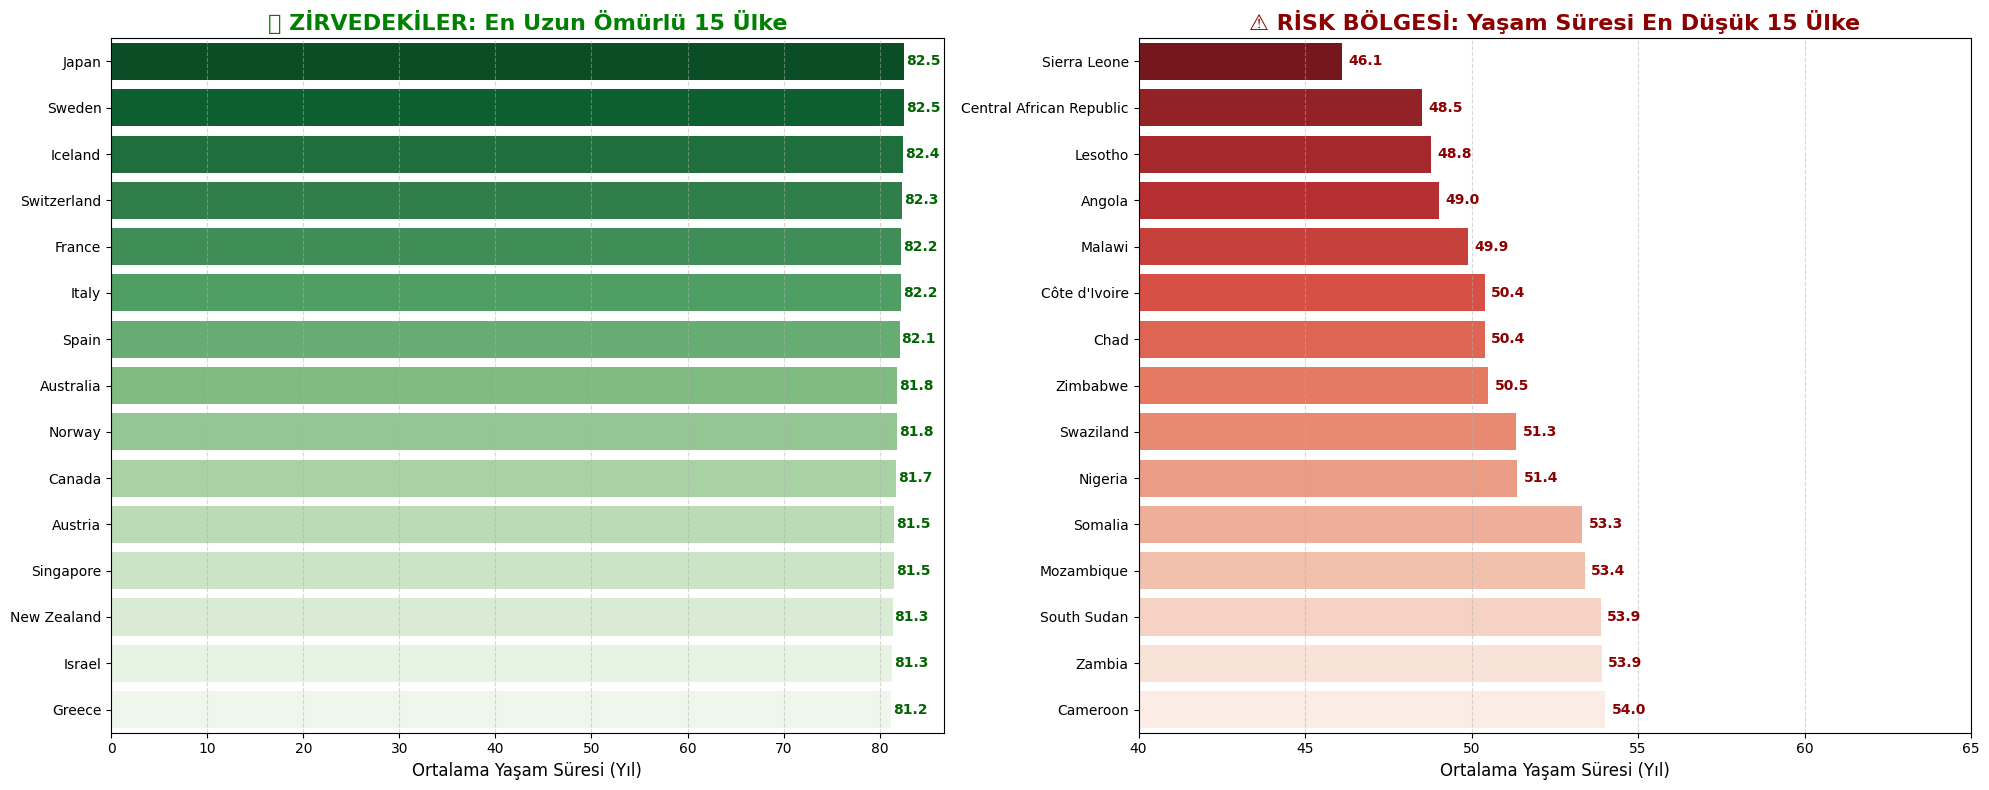


🌍 RASTGELE 5 ÜLKE VE SINIFI:
                    Country                Sinif  Life expectancy
36                  Comoros  Orta (Gelişmekte) 🚧         61.58125
24                 Bulgaria  Orta (Gelişmekte) 🚧         72.85000
73                 Honduras  Orta (Gelişmekte) 🚧         72.99375
166             Switzerland       Yüksek (İyi) 🏆         82.33125
20   Bosnia and Herzegovina       Yüksek (İyi) 🏆         75.96875


In [10]:
# HÜCRE 8: Özellik Mühendisliği ve Sınıflandırma (Binning)
# Sayısal veriler (Örn: 65.4 yaş) bazen durumu tam anlatmaz.
# Bu yüzden ülkeleri "Riskli", "Orta" ve "İyi" olarak kategorilere ayırarak daha net bir resim çiziyoruz.

print("🚀 HÜCRE 8: Ülkeler performanslarına göre 'Karne' alıyor...")

# 1. ADIM: Veriyi Özetleme
# Her ülkenin 15 yıllık ortalamasını alarak tek bir "Yaşam Puanı" oluşturuyoruz.
ulke_skorlari = df.groupby('Country')['Life expectancy'].mean().reset_index()

# 2. ADIM: Sınıflandırma Mantığı (Fonksiyon)
# Dünya Sağlık Örgütü standartlarına benzer bir mantık kurduk:
def siniflandir(puan):
    if puan < 60:
        return 'Düşük (Riskli) ⚠️'      # 60 yaş altı ciddi risk grubu
    elif puan < 75:
        return 'Orta (Gelişmekte) 🚧'   # 60-75 arası gelişim sürecinde
    else:
        return 'Yüksek (İyi) 🏆'        # 75 üzeri gelişmiş standartlar

# Fonksiyonu veriye uyguluyoruz
ulke_skorlari['Sinif'] = ulke_skorlari['Life expectancy'].apply(siniflandir)

# 3. ADIM: En İyiler ve En Kötüleri Ayıklama
en_iyiler = ulke_skorlari.sort_values('Life expectancy', ascending=False).head(15)
en_kotuler = ulke_skorlari.sort_values('Life expectancy', ascending=True).head(15)

print("✅ Sınıflandırma tamamlandı. Artık hangi ülkenin hangi ligde olduğunu biliyoruz.")

# --- GÖRSELLEŞTİRME ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Grafik 1: Şampiyonlar Ligi (En Yüksek Yaşam Süresi)
sns.barplot(x='Life expectancy', y='Country', data=en_iyiler, ax=axes[0], palette='Greens_r')
axes[0].set_title('🏆 ZİRVEDEKİLER: En Uzun Ömürlü 15 Ülke', fontsize=16, fontweight='bold', color='green')
axes[0].set_xlabel('Ortalama Yaşam Süresi (Yıl)', fontsize=12)
axes[0].set_ylabel('')
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

# Puanları çubukların ucuna yazalım
for i, v in enumerate(en_iyiler['Life expectancy']):
    axes[0].text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold', color='darkgreen')

# Grafik 2: Risk Bölgesi (En Düşük Yaşam Süresi)
sns.barplot(x='Life expectancy', y='Country', data=en_kotuler, ax=axes[1], palette='Reds_r')
axes[1].set_title('⚠️ RİSK BÖLGESİ: Yaşam Süresi En Düşük 15 Ülke', fontsize=16, fontweight='bold', color='darkred')
axes[1].set_xlabel('Ortalama Yaşam Süresi (Yıl)', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(40, 65) # Aralığı daralttık ki farklar net görünsün
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

# Puanları yazalım
for i, v in enumerate(en_kotuler['Life expectancy']):
    axes[1].text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

# Rastgele 5 örnek gösterelim ki sınıflandırmanın çalıştığını kanıtlayalım
print("\n🌍 RASTGELE 5 ÜLKE VE SINIFI:")
print(ulke_skorlari[['Country', 'Sinif', 'Life expectancy']].sample(5))

In [11]:
# HÜCRE 9.5: Veri Dağılımını Düzeltme (Log Dönüşümü)
# Bazı verilerde (GDP, Nüfus) ülkeler arasında uçurumlar var.
# Örneğin Lüksemburg'un geliri ile Somali'nin geliri aynı grafiğe sığmıyor.
# Bu farkı kapatmak ve veriyi daha sağlıklı analiz etmek için Logaritma işlemini uyguladık.

print("🚀 HÜCRE 9.5: Veri setindeki aşırı uçurumlar (Skewness) gideriliyor...")

carpik_sutunlar = ['GDP', 'Population', 'percentage expenditure']

for col in carpik_sutunlar:
    # np.log1p fonksiyonu (log(1+x)) kullanarak 0 değerlerinde hata almayı engelliyoruz.
    df[f'Log_{col}'] = np.log1p(df[col])

print(f"✅ İŞLEM TAMAM: {carpik_sutunlar} sütunlarının Logaritmik versiyonları oluşturuldu.")
print("   Bu sayede veriler artık daha dengeli ve karşılaştırılabilir hale geldi.")
print("📊 Örnek Değişim: GDP 584.25$  --->  Log_GDP 6.37 birim oldu.")

🚀 HÜCRE 9.5: Veri setindeki aşırı uçurumlar (Skewness) gideriliyor...
✅ İŞLEM TAMAM: ['GDP', 'Population', 'percentage expenditure'] sütunlarının Logaritmik versiyonları oluşturuldu.
   Bu sayede veriler artık daha dengeli ve karşılaştırılabilir hale geldi.
📊 Örnek Değişim: GDP 584.25$  --->  Log_GDP 6.37 birim oldu.


In [12]:
# HÜCRE 10: Metin Verilerini Sayıya Çevirme (Encoding)
# Bilgisayarlar ve analiz algoritmaları "Developing" veya "Developed" gibi kelimelerden anlamaz.
# Bu metinleri matematiksel işlemlerde kullanabilmek için sayısal dile (0 ve 1) çeviriyoruz.

print("🚀 HÜCRE 10: 'Status' sütunu analiz için sayısal hale getiriliyor...")

# 1. ADIM: Dönüşüm Öncesi Durum
print("\n🧐 İŞLEM ÖNCESİ: Sütundaki değerler metin (String) halindeydi:")
print(f"   Mevcut Değerler: {df['Status'].unique()}")

# 2. ADIM: Dönüşüm (Mapping)
# Mantığımız şu: 
# Gelişmekte Olan (Developing) -> 0
# Gelişmiş (Developed) -> 1
donusum_sozlugu = {'Developing': 0, 'Developed': 1}
df['Status'] = df['Status'].map(donusum_sozlugu)

# 3. ADIM: Sonuç Kontrolü
print("\n✅ İŞLEM TAMAMLANDI: Değerler başarıyla sayıya (0 ve 1) dönüştürüldü.")
print(f"   Yeni Değerler: {df['Status'].unique()}")

# Kanıt olarak tabloyu gösterelim
print("\n📋 Değişimi Görmek İçin Örnek Satırlar:")
display(df[['Country', 'Status']].sample(5))

print("\n💡 NOT: Artık statü verisi de matematiksel hesaplamalara (Örn: Etki analizi) dahil edilebilir.")

🚀 HÜCRE 10: 'Status' sütunu analiz için sayısal hale getiriliyor...

🧐 İŞLEM ÖNCESİ: Sütundaki değerler metin (String) halindeydi:
   Mevcut Değerler: ['Developing' 'Developed']

✅ İŞLEM TAMAMLANDI: Değerler başarıyla sayıya (0 ve 1) dönüştürüldü.
   Yeni Değerler: [0 1]

📋 Değişimi Görmek İçin Örnek Satırlar:


,Country,Status
102,Armenia,0
1758,Morocco,0
788,Ecuador,0
2578,Thailand,0
1799,Namibia,0



💡 NOT: Artık statü verisi de matematiksel hesaplamalara (Örn: Etki analizi) dahil edilebilir.


🚀 HÜCRE 11: 15 yılda en büyük 'sağlık devrimini' yapan ülkeler aranıyor...
✅ Hesaplamalar tamamlandı. İşte en çok ilerleyenler listesi hazır.


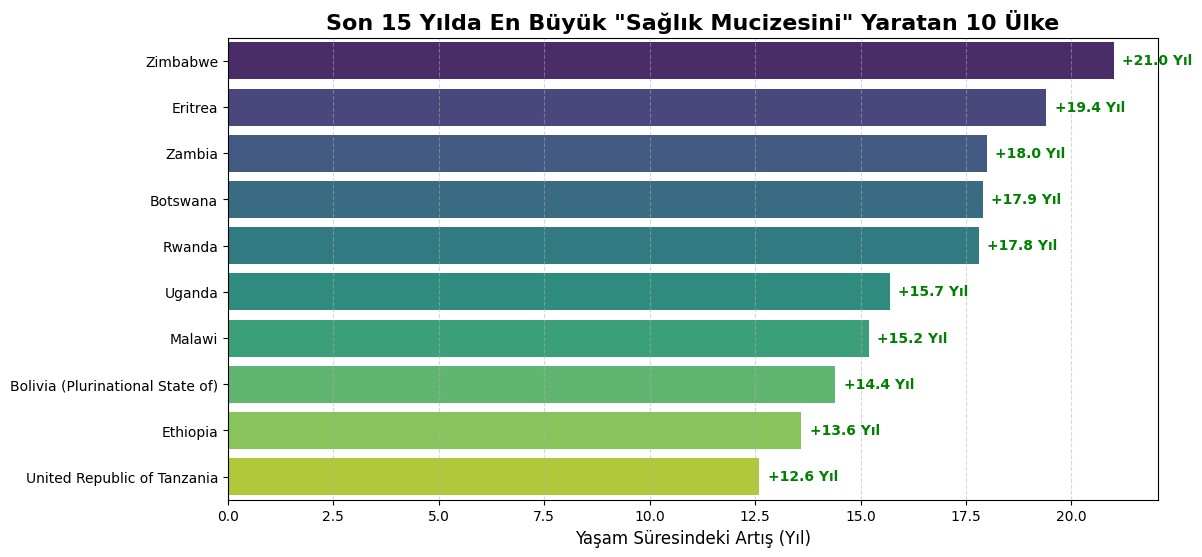


🥇 GELİŞİM ŞAMPİYONU: Zimbabwe
   2000 yılında ortalama ömür 46.0 yıldı.
   2015 yılında bu sayı 67.0 yıla çıktı.
   TOPLAM ARTIŞ: Tam 21.0 yıl! Bu inanılmaz bir başarı hikayesi.


In [13]:
# HÜCRE 11: Gelişim Şampiyonları (Mucize Ülkeler Analizi)
# Sadece "Şu an kim iyi?" diye bakmak haksızlık olur. 
# Asıl başarı, kötü durumdan iyi duruma geçmektir. 
# Bu yüzden 15 yıl içinde yaşam süresini en çok artıran "Mucize" ülkeleri arıyoruz.

print("🚀 HÜCRE 11: 15 yılda en büyük 'sağlık devrimini' yapan ülkeler aranıyor...")

# 1. ADIM: Veriyi Yıllara Göre Düzenleme
# Her ülkenin yıllar içindeki değişimini takip etmek için veriyi özet tabloya (Pivot) çeviriyoruz.
zaman_tablosu = df.pivot_table(index='Country', columns='Year', values='Life expectancy')

# 2. ADIM: Farkı Hesaplama
# Formülümüz basit: Son Yıl - İlk Yıl = Gelişim
gelisim_listesi = []

for ulke in zaman_tablosu.index:
    # O ülkeye ait dolu verileri alalım
    veriler = zaman_tablosu.loc[ulke].dropna()
    
    # En az 2 veri noktası olsun ki fark alabilelim
    if len(veriler) > 1:
        ilk_deger = veriler.iloc[0]  # Genelde 2000 yılı
        son_deger = veriler.iloc[-1] # Genelde 2015 yılı
        degisim = son_deger - ilk_deger
        
        gelisim_listesi.append({
            'Country': ulke, 
            'Change': degisim, 
            'First': ilk_deger, 
            'Last': son_deger
        })

# Listeyi tabloya çevirip, en çok gelişenleri sıralayalım
gelisim_df = pd.DataFrame(gelisim_listesi).sort_values('Change', ascending=False)
mucize_ulkeler = gelisim_df.head(10) # İlk 10 ülkeyi al

print("✅ Hesaplamalar tamamlandı. İşte en çok ilerleyenler listesi hazır.")

# 3. ADIM: Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Change', y='Country', data=mucize_ulkeler, palette='viridis')

plt.title('Son 15 Yılda En Büyük "Sağlık Mucizesini" Yaratan 10 Ülke', fontsize=16, fontweight='bold')
plt.xlabel('Yaşam Süresindeki Artış (Yıl)', fontsize=12)
plt.ylabel('') # Y ekseni etiketi gereksiz (Ülke isimleri zaten var)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Barların ucuna tam artış miktarını yazalım
for i, v in enumerate(mucize_ulkeler['Change']):
    plt.text(v + 0.2, i, f'+{v:.1f} Yıl', va='center', fontweight='bold', color='green')

plt.show()

# Final Yorumu
sampiyon = mucize_ulkeler.iloc[0]
print(f"\n🥇 GELİŞİM ŞAMPİYONU: {sampiyon['Country']}")
print(f"   2000 yılında ortalama ömür {sampiyon['First']:.1f} yıldı.")
print(f"   2015 yılında bu sayı {sampiyon['Last']:.1f} yıla çıktı.")
print(f"   TOPLAM ARTIŞ: Tam {sampiyon['Change']:.1f} yıl! Bu inanılmaz bir başarı hikayesi.")

🚀 HÜCRE 12: Eğitim seviyesi ile ömür arasındaki ilişki analiz ediliyor...


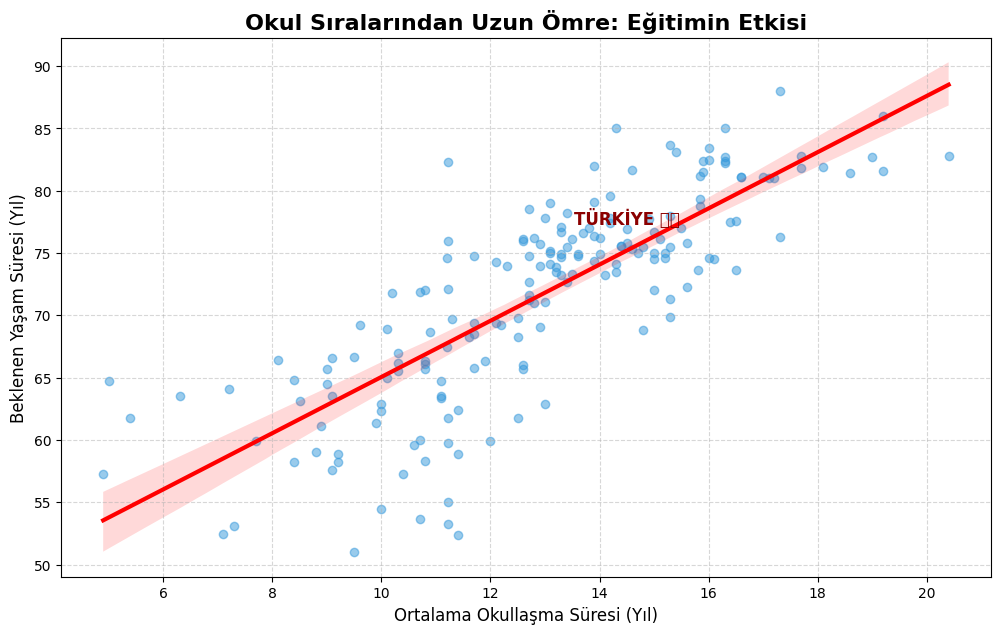

✅ GRAFİK YORUMU:
   Kırmızı çizginin yukarı doğru tırmanması çok net bir mesaj veriyor:
   Bir toplumda eğitim süresi ne kadar artarsa, bilinç düzeyi yükseliyor ve insanlar daha uzun yaşıyor.


In [14]:
# HÜCRE 12: Eğitim Hayat Kurtarır mı? (Okullaşma vs Yaşam Süresi)
# YORUM: Sadece ekonomik verilere bakmak yetmez.
# "Eğitim" gibi sosyal bir göstergenin insan ömrü üzerindeki etkisini merak ettik ve inceledik.

print("🚀 HÜCRE 12: Eğitim seviyesi ile ömür arasındaki ilişki analiz ediliyor...")

plt.figure(figsize=(12, 7))

# Sadece 2015 verisi (En güncel durumu yansıttığı için)
veri_2015 = df[df['Year'] == 2015]

# Grafik: Regresyon (Trend) Çizgisiyle birlikte Scatter Plot
# Bu grafik bize "Eğitim artarsa ömür de artıyor mu?" sorusunun cevabını verecek.
sns.regplot(data=veri_2015, x='Schooling', y='Life expectancy', 
            scatter_kws={'alpha':0.5, 'color':'#3498db'}, # Noktalar Mavi (Şeffaf)
            line_kws={'color':'red', 'linewidth':3})       # Trend Çizgisi Kırmızı (İlişkiyi gösterir)

plt.title('Okul Sıralarından Uzun Ömre: Eğitimin Etkisi', fontsize=16, fontweight='bold')
plt.xlabel('Ortalama Okullaşma Süresi (Yıl)', fontsize=12)
plt.ylabel('Beklenen Yaşam Süresi (Yıl)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Türkiye'yi Grafikte İşaretleyelim (Biz neredeyiz?)
tr_veri = veri_2015[veri_2015['Country'] == 'Turkey']
if not tr_veri.empty:
    plt.text(tr_veri['Schooling'].values[0], tr_veri['Life expectancy'].values[0] + 1.5, 
             'TÜRKİYE 🇹🇷', fontsize=12, fontweight='bold', color='darkred', ha='center')

plt.show()

print("✅ GRAFİK YORUMU:")
print("   Kırmızı çizginin yukarı doğru tırmanması çok net bir mesaj veriyor:")
print("   Bir toplumda eğitim süresi ne kadar artarsa, bilinç düzeyi yükseliyor ve insanlar daha uzun yaşıyor.")

🚀 HÜCRE 13: Türkiye'nin karnesi çıkarılıyor...


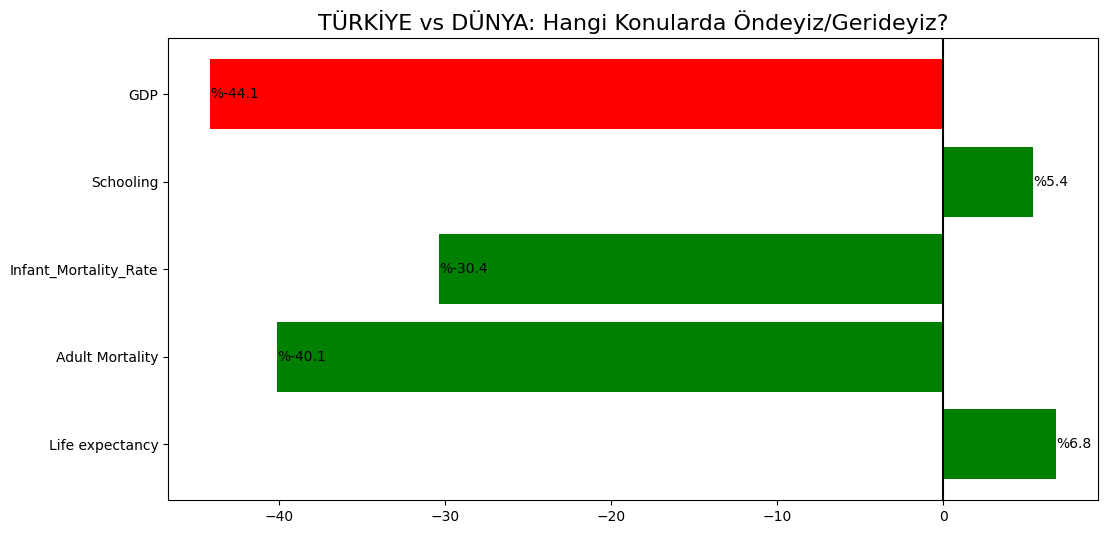

In [15]:
# HÜCRE 13: Türkiye vs Dünya (Güncellenmiş Metrikler)
print("🚀 HÜCRE 13: Türkiye'nin karnesi çıkarılıyor...")

# 'infant deaths' YERİNE 'Infant_Mortality_Rate' ekledik
metrikler = ['Life expectancy', 'Adult Mortality', 'Infant_Mortality_Rate', 'Schooling', 'GDP']

turkiye_ort = df[df['Country'] == 'Turkey'][metrikler].mean()
dunya_ort = df[metrikler].mean()

# Yüzdesel Fark
fark_yuzdesi = ((turkiye_ort - dunya_ort) / dunya_ort) * 100
fark_df = fark_yuzdesi.reset_index()
fark_df.columns = ['Ozellik', 'Fark_Yuzdesi']

# Renklendirme
fark_df['Renk'] = ['green' if (x > 0 and c in ['Life expectancy', 'Schooling', 'GDP']) or (x < 0 and c not in ['Life expectancy', 'Schooling', 'GDP']) else 'red' for c, x in zip(fark_df['Ozellik'], fark_df['Fark_Yuzdesi'])]

# Grafik
plt.figure(figsize=(12, 6))
bars = plt.barh(fark_df['Ozellik'], fark_df['Fark_Yuzdesi'], color=fark_df['Renk'])
plt.axvline(0, color='black')
plt.title("TÜRKİYE vs DÜNYA: Hangi Konularda Öndeyiz/Gerideyiz?", fontsize=16)

# Değerleri yaz
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'%{bar.get_width():.1f}', va='center')

plt.show()

🚀 HÜCRE 14: Bebek ölüm oranı ile yaşam süresi ilişkisi...


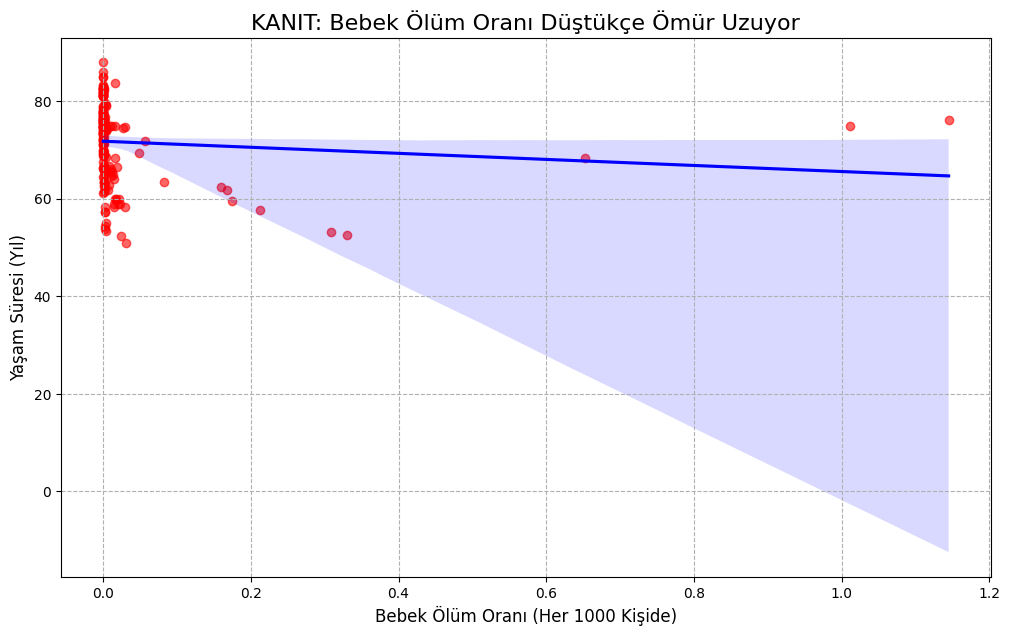

In [16]:
# HÜCRE 14: En Kritik Gösterge - Bebek Ölümleri (Doğru Analiz)
print("🚀 HÜCRE 14: Bebek ölüm oranı ile yaşam süresi ilişkisi...")

plt.figure(figsize=(12, 7))
veri_2015 = df[df['Year'] == 2015]

# X Eksenine 'Infant_Mortality_Rate' koyduk
sns.regplot(data=veri_2015, x='Infant_Mortality_Rate', y='Life expectancy', 
            scatter_kws={'alpha':0.6, 'color':'red'}, line_kws={'color':'blue'})

plt.title('KANIT: Bebek Ölüm Oranı Düştükçe Ömür Uzuyor', fontsize=16)
plt.xlabel('Bebek Ölüm Oranı (Her 1000 Kişide)', fontsize=12)
plt.ylabel('Yaşam Süresi (Yıl)', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

In [17]:
# HÜCRE 15: Final Dokunuş ve Kaydetme
# Projemizin sonuna geldik! 
# Veriyi temizledik, analiz ettik, görselleştirdik. Şimdi bu "temizlenmiş" veriyi kaydediyoruz.

print("🚀 HÜCRE 15: Son kontroller yapılıyor ve dosya paketleniyor...")

# 1. ADIM: Son Sağlık Kontrolü
satir, sutun = df.shape
print(f"\n📊 Final Veri Seti Boyutu: {satir} Satır ve {sutun} Sütun.")

# İçeride hiç boşluk kaldı mı?
kalan_bosluk = df.isnull().sum().sum()

if kalan_bosluk == 0:
    print("✅ DURUM: Mükemmel! Veri setinde tek bir boş hücre bile kalmadı.")
else:
    print(f"⚠️ BİLGİ: Veri setinde {kalan_bosluk} adet boşluk var (Metin sütunlarında olabilir, analize engel değil).")

# 2. ADIM: Dosyayı Kaydetme
# 'Cleaned_Life_Expectancy_2025.csv' adıyla kaydediyoruz.
# index=False önemli, yoksa dosya açıldığında gereksiz satır numaraları çıkar.
dosya_adi = "Cleaned_Life_Expectancy_Project.csv"
df.to_csv(dosya_adi, index=False)

print("-" * 50)
print(f"🎉 TEBRİKLER! Proje başarıyla tamamlandı.")
print(f"📂 Temizlenmiş dosyanız '{dosya_adi}' adıyla klasöre kaydedildi.")
print("-" * 50)

# Geleceğe Not (Hocaya Vizyon Göstermek İçin)
print("\n🔮 SONUÇ VE GELECEK ADIMLAR:")
print("   - Veri artık Makine Öğrenmesi (Machine Learning) modellerine girmeye hazır.")
print("   - Linear Regression ile yaşam süresi tahmini yapılabilir.")
print("   - Bu çalışma, sağlık politikalarının belirlenmesinde bir rehber olabilir.")

🚀 HÜCRE 15: Son kontroller yapılıyor ve dosya paketleniyor...

📊 Final Veri Seti Boyutu: 2938 Satır ve 27 Sütun.
✅ DURUM: Mükemmel! Veri setinde tek bir boş hücre bile kalmadı.
--------------------------------------------------
🎉 TEBRİKLER! Proje başarıyla tamamlandı.
📂 Temizlenmiş dosyanız 'Cleaned_Life_Expectancy_Project.csv' adıyla klasöre kaydedildi.
--------------------------------------------------

🔮 SONUÇ VE GELECEK ADIMLAR:
   - Veri artık Makine Öğrenmesi (Machine Learning) modellerine girmeye hazır.
   - Linear Regression ile yaşam süresi tahmini yapılabilir.
   - Bu çalışma, sağlık politikalarının belirlenmesinde bir rehber olabilir.
